# Image Masking

Image masking is an important step in the Poisson image blending algorithm. It determines which parts of the source image, or object image, and target image, or background image, are blended together. The mask has values that range from 0 to 1, where 0 represents areas that should not be blended (e.g. background) and 1 represents areas that should be blended (e.g. foreground).

After creating the mask, the blending process involves solving a Poisson equation to find the optimal values for the pixels in the blended region. The gradient of the blended image is constrained to match the gradient of the target image in the masked region, ensuring a smooth transition between the two.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

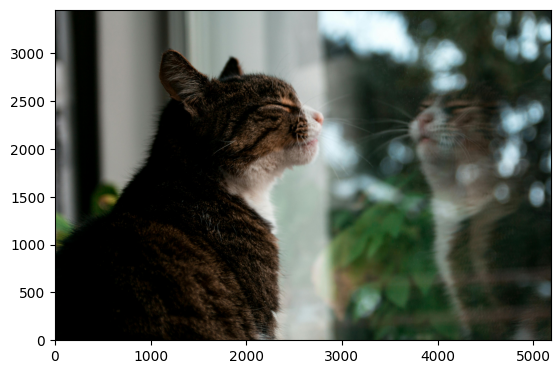

In [2]:
image = cv2.imread('cat.jpg') # reads in BGR order
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img[::-1], origin='lower')

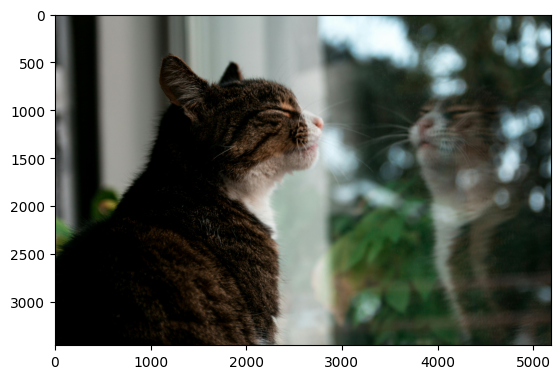

In [3]:
plt.imshow(img) # help see with y-axis on top

In [4]:
type(img)

numpy.ndarray

In [5]:
img.shape

(3456, 5184, 3)

## Create Mask

In [6]:
x = np.zeros([3456, 5184], dtype='uint8')

# Define area to be masked, masking area in white
mask_color = (255, 255, 255)

`cv2.rectangle` parameters (image, start_point{x1,y1 coordinate}, end_point{x2,y2 coordinate}, color, thickness{in pixels, -1 default fill in})
Thanks [GeeksforGeeks](https://www.geeksforgeeks.org/python-opencv-cv2-rectangle-method/).

In [7]:
x = cv2.rectangle(x, (100,100), (2800,3400), mask_color, -1)

In [8]:
masked_image = cv2.bitwise_and(img, img, mask=x)

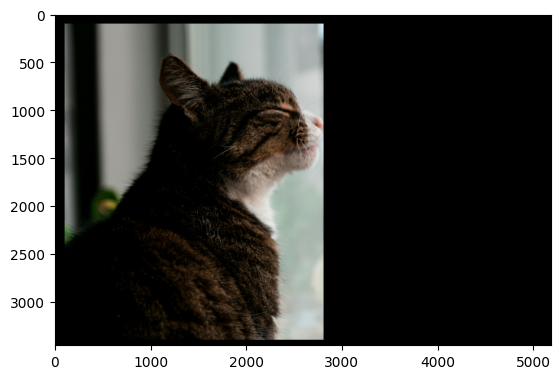

In [9]:
plt.imshow(masked_image)

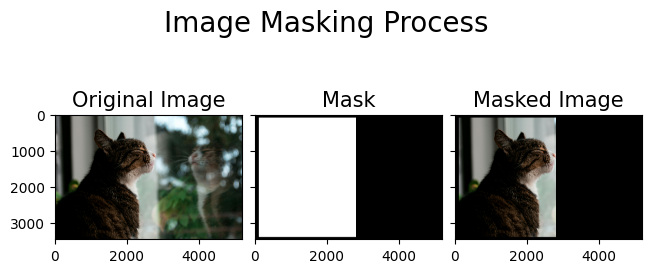

In [18]:
fig, axes = plt.subplots(1, 3, layout='constrained', sharey=True, sharex=True)

axes[0].imshow(img)
axes[0].set_title('Original Image', fontsize = 15)

axes[1].imshow(x, cmap='gray')
axes[1].set_title('Mask', fontsize = 15)

axes[2].imshow(masked_image)
axes[2].set_title('Masked Image', fontsize = 15)

plt.suptitle('Image Masking Process',y=.85, fontsize = 20)
plt.savefig('image-masking.png')
plt.show()

This example shows how masking is used to manipulate which object will be used in the Poisson image blending process. Further improvement could be made to shrink the mask window by slightly adjusting x,y start point coordinates.